In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

shape: (1237, 2)
         bmi       index
0  39.047808  248038.jpg
1  29.285856  250464.jpg
2  42.820836  263711.jpg
3  23.025951  270020.jpg
4  19.004109  279426.jpg
               bmi
count  1237.000000
mean     26.416545
std       5.128314
min      15.660503
25%      22.804931
50%      25.675676
75%      29.049587
max      52.450643


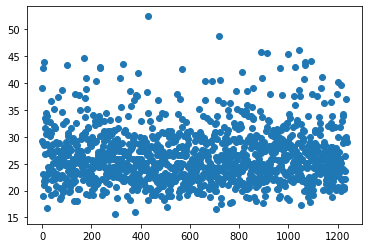

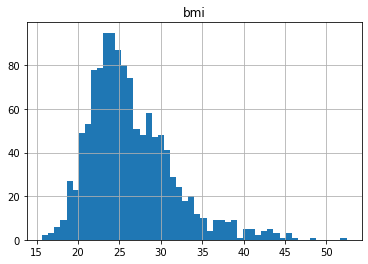

In [9]:
face_bmi = pd.read_csv('../data/raw/train.csv', usecols=['index','bmi'])
print(f'shape: {face_bmi.shape}')
print(face_bmi.head())
print(face_bmi.describe())
plt.scatter(face_bmi.index.values, face_bmi['bmi'])
plt.show()
hist = face_bmi.hist(bins=50)

In [28]:
import os

import pandas as pd

face_bmi = pd.read_csv('../data/raw/train.csv', usecols=['index','bmi'])
clean_face_bmi = face_bmi.copy()

# remove entries with no associated image
img_dir = '../data/raw/images/face'
for idx in face_bmi.index:
#     print(face_bmi['index'][idx])
    if not os.path.isfile(f'{img_dir}/{face_bmi["index"][idx]}'):
        clean_face_bmi.drop(index=idx, inplace=True)

        
clean_face_bmi['cat1'] = pd.cut(clean_face_bmi['bmi'], bins=[0, 18.5, 25., 30, 100], right=True, labels=False)
clean_face_bmi['cat2'] = pd.cut(clean_face_bmi['bmi'], bins=[0, 18.5, 25., 30, 35, 40, 100], right=True, labels=False)

interim_dir = '../data/interim'
clean_face_bmi.to_csv(os.path.join(interim_dir, 'face_bmi.csv'))
clean_face_bmi.to_pickle(os.path.join(interim_dir, 'face_bmi.pkl'))

face-bmi:
shape: (1228, 4)
         bmi       index  cat1  cat2
0  39.047808  248038.jpg     3     4
1  29.285856  250464.jpg     2     2
2  42.820836  263711.jpg     3     5
3  23.025951  270020.jpg     1     1
4  19.004109  279426.jpg     1     1
unique counts:
1    524
2    443
3    243
0     18
Name: cat1, dtype: int64
1    524
2    443
3    167
4     45
5     31
0     18
Name: cat2, dtype: int64
               bmi         cat1         cat2
count  1228.000000  1228.000000  1228.000000
mean     26.430940     1.741857     1.828990
std       5.137027     0.785550     0.983187
min      15.660503     0.000000     0.000000
25%      22.804931     1.000000     1.000000
50%      25.675676     2.000000     2.000000
75%      29.049587     2.000000     2.000000
max      52.450643     3.000000     5.000000


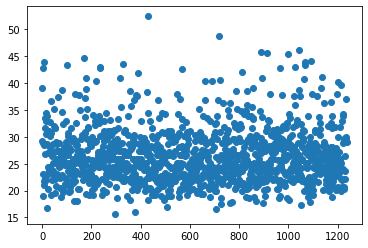

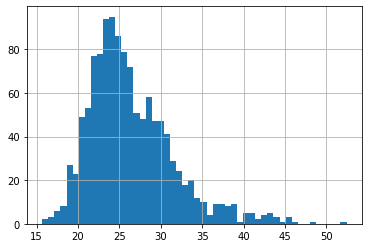

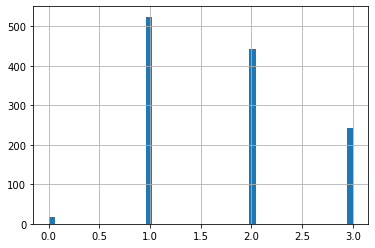

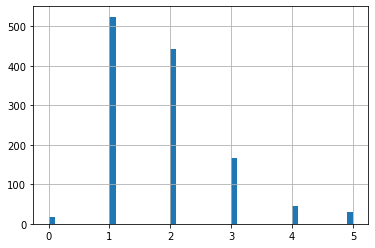

In [29]:
face_bmi = pd.read_pickle('../data/interim/face_bmi.pkl')
print('face-bmi:')
print(f'shape: {face_bmi.shape}')
print(face_bmi.head())
print('unique counts:')
print(face_bmi['cat1'].value_counts())
print(face_bmi['cat2'].value_counts())
print(face_bmi.describe())
plt.scatter(face_bmi.index.values, face_bmi['bmi'])
plt.show()
face_bmi['bmi'].hist(bins=50)
plt.show()
face_bmi['cat1'].hist(bins=50)
plt.show()
face_bmi['cat2'].hist(bins=50)
plt.show()